<a href="https://colab.research.google.com/github/CSUCI-CuriculumAndInstruction/CII/blob/main/ciirandom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Welcome to Schiro's Curriculum Ideologies Inventory. 
Click the play button below to measure your curriucular ideology

RESULTS
-------
Learner Centered =  2.17
Social Reconstruction =  2.17
Social Efficiency =  3.00
Scholar Academic =  2.67


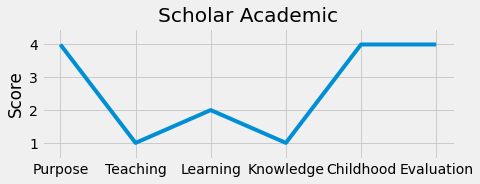

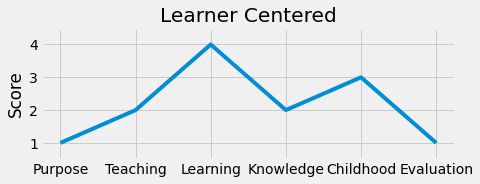

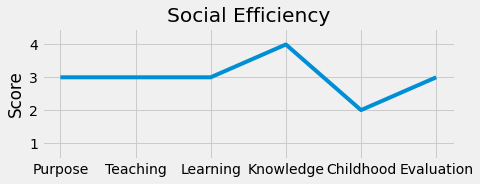

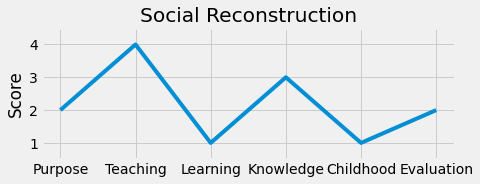

In [24]:
#@title Curriculum Ideologies Inventory { run: "auto", vertical-output: true, display-mode: "form" }
import pandas as pd
from collections import Counter
from IPython.display import clear_output
import random
import textwrap
import re
from matplotlib import pyplot as plt

questions = [[('Schools should provide children with the ability to perceive problems in society, envision a better society, and act to change society so that there is social justice and a better life for all people.', 'Social Efficiency'), 
('Schools should fulfill the needs of society by efficiently training youth to function as mature constructive members of society.', 'Social Reconstruction'),
('Schools should be communities where the accumulated knowledge of the culture is transmitted to the youth.', 'Scholar Academic'),
('Schools should be enjoyable, stimulating, child-Learner Centered environments organized around the developmental needs and interests of children as those needs and interests present themselves from day to day.', 'Learner Centered')], 

[('Teachers should be supervisors of student learning, utilizing instructional strategies that will optimize student learning.', 'Social Efficiency'), 
('Teachers should be companions to students, using the environment within which the student lives to help the student learn.', 'Social Reconstruction'),
('Teachers should be aids to children, helping them learn by presenting them with experiences from which they can make meaning.', 'Scholar Academic'),
('Teachers should be knowledgeable people, transmitting that which is known to those who do not know it.', 'Learner Centered')], 

[('Learning best proceeds when the student is presented with the appropriate stimulus materials and positive reinforcement.', 'Social Efficiency'), 
('Learning best proceeds when the teacher clearly and accurately presents to the student that knowledge which the student is to acquire.', 'Social Reconstruction'),
('Learning best takes place when children are motivated to actively engage in experiences that allow them to create their own knowledge and understanding of the world in which they live.', 'Scholar Academic'),
('Learning best occurs when a student confronts a real social crisis and participates in the construction of a solution to that crisis.', 'Learner Centered')], 

[('The knowledge of most worth is the structured knowledge and ways of thinking that have come to be valued by the culture over time.', 'Social Efficiency'), 
('The knowledge of most worth is the personal meaning of oneself and of one\’s world that comes from one’s direct experience in the world and one’s personal response to such experience.', 'Social Reconstruction'),
('The knowledge of most worth is the specific skills and capabilities for action that allow an individual to live a constructive life.', 'Scholar Academic'),
('The knowledge of most worth is a set of social ideals, a commitment to those ideals, and an understanding of how to implement those ideals.', 'Learner Centered')], 

[('Childhood is essentially a time of learning in preparation for adulthood, when one will be a constructive, contributing member of society.', 'Social Efficiency'), 
('Childhood is essentially a period of intellectual development highlighted by growing reasoning ability and capacity for memory that results in ever greater absorption of cultural knowledge.', 'Social Reconstruction'),
('Childhood is essentially a time when children unfold according to their own innate natures, felt needs, organic impulses, and internal timetables. The focus is on children as they are during childhood rather than as they might be as adults.', 'Scholar Academic'),
('Childhood is essentially a time for practice in and preparation for acting upon society to improve both oneself and the nature of society.', 'Learner Centered')], 

[('Evaluation should objectively indicate to others whether or not students can or cannot perform specific skills. Its purpose is to certify students’ competence to perform specific tasks.', 'Social Efficiency'), 
('Evaluation should continuously diagnose children’s needs and growth so that further growth can be promoted by appropriate adjustment of their learning environment. It is primarily for the children’s benefit, not for comparing children with each other or measuring them against predetermined standards.', 'Social Reconstruction'),
('Evaluation should be a subjective comparison of students’ performance with their capabilities. Its purpose is to indicate to both the students and others the extent to which they are living up to their capabilities.', 'Scholar Academic'),
('Evaluation should objectively determine the amount of knowledge students have acquired. It allows students to be ranked from those with the greatest intellectual gain to those with the least.', 'Learner Centered')]]


wrapper = textwrap.TextWrapper(width=80)


def ask_part(answers):
    random.shuffle(answers)
    for letter, answer in zip('ABCD', answers):
        print(f'{letter}.', wrapper.fill(text=answer[0]), end= '\n\n')
    while True:
        print(wrapper.fill(text='Enter the letter value for each statement ranked from most liked to least liked:'))
        user_input = input()
        part_rank = re.findall('[ABCD]', user_input.upper())
        if sorted(part_rank) != list('ABCD'):
            print(wrapper.fill(text='Invalid input! Please try again.'))
        else:
            return Counter({answers['ABCD'.index(c)][1]: i + 1 for i, c in enumerate(reversed(part_rank))})


print(wrapper.fill(text='Read each of the following parts carefully. Then, rank each statement in order from most liked to least liked. This is not a test and there is no one right answer. Take your time.'))
print('Press enter to move to the next section.')
input()
clear_output()

total_score = Counter()
df = pd.DataFrame(columns=['Part','Scholar Academic', 'Learner Centered', 'Social Efficiency', 'Social Reconstruction'])
realms = ['Purpose', 'Teaching', 'Learning', 'Knowledge', 'Childhood', 'Evaluation']

for i, part in enumerate(questions):
    print("\033[1m" + f"PART {i+1}" + "\033[0m")
    response = ask_part(part)
    total_score += response
    df.at[str(i), 'Part'] = realms[i]
    for key, value in response.items():
        df.at[str(i), key] = value
    clear_output() 

print('RESULTS', '-------', *[f'{key} = {value/len(questions): .2f}' for key, value in total_score.items()], sep = '\n')

x = df['Part']

curriculums = ['Scholar Academic', 'Learner Centered', 'Social Efficiency', 'Social Reconstruction']

for i, ideology in enumerate(curriculums):
    plt.style.use('fivethirtyeight')
    f = plt.figure(i+1)
    f.set_figwidth(6.6)
    f.set_figheight(2.25)
    plt.ylim(0.5, 4.5)
    plt.title(ideology)
    plt.plot(x, df[ideology])
    plt.ylabel('Score')


plt.show()
